In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv("./3393460.csv",index_col="DATE")
df.head()

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
2016-01-01,IR000407540,"TEHRAN MEHRABAD, IR",NaN,NaN,49,54.0,41.0
2016-01-02,IR000407540,"TEHRAN MEHRABAD, IR",0.03,NaN,44,51.0,NaN
2016-01-03,IR000407540,"TEHRAN MEHRABAD, IR",0.00,NaN,36,43.0,NaN
2016-01-04,IR000407540,"TEHRAN MEHRABAD, IR",0.00,NaN,38,44.0,NaN
2016-01-05,IR000407540,"TEHRAN MEHRABAD, IR",0.00,NaN,44,52.0,35.0


In [3]:
# from datetime import  datetime
# datetime.today()
def convertt(x):
    try:
        y= (x - 32) * 5.0/9.0
        return np.round(y,1)
    except : return None
convertt(91)


32.8

In [4]:
# df.tail(10)
df["averged"]=df["TAVG"].apply(convertt)
df.loc["2023-07-01":"2023-07-13"]


,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,averged
DATE,,,,,,,,
2023-07-01,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,88,101.0,NaN,31.1
2023-07-02,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,86,98.0,NaN,30.0
2023-07-03,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,88,99.0,NaN,31.1
2023-07-04,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,90,99.0,NaN,32.2
2023-07-05,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,88,97.0,NaN,31.1
2023-07-06,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,85,95.0,NaN,29.4
2023-07-07,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,87,95.0,77.0,30.6
2023-07-08,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,90,97.0,78.0,32.2
2023-07-09,IR000407540,"TEHRAN MEHRABAD, IR",0.0,NaN,93,101.0,82.0,33.9


In [5]:
df.isnull().sum()/df.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.011649
SNWD       0.993083
TAVG       0.000000
TMAX       0.183109
TMIN       0.365126
averged    0.000000
dtype: float64

In [6]:
df.drop(["STATION","NAME"],axis=1,inplace=True)
# df.NAME.value_counts()

In [7]:
len(df["SNWD"].value_counts())
len(df)

2747

In [8]:
df["PRCP"].fillna(0,inplace=True)
df["PRCP"].isna().sum()

0

In [9]:
df["SNWD"].fillna(0,inplace=True)
df["SNWD"].isna().sum()

0

In [10]:

df["TMIN"].fillna(method="ffill",inplace=True)
df["TMIN"].isna().sum()

0

In [11]:
df["TMAX"].fillna(method="ffill",inplace=True)
df["TMAX"].isna().sum()

0

In [12]:
df.isnull().sum()

PRCP       0
SNWD       0
TAVG       0
TMAX       0
TMIN       0
averged    0
dtype: int64

In [13]:
df.drop("SNWD",axis=1,inplace=True)

In [14]:
df.index=pd.to_datetime(df.index)

In [15]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
               '2023-07-12', '2023-07-13'],
              dtype='datetime64[ns]', name='DATE', length=2747, freq=None)

In [16]:
df.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=2747)

In [17]:
df.apply(lambda x:(x==9999).sum())

PRCP       0
TAVG       0
TMAX       0
TMIN       0
averged    0
dtype: int64

<AxesSubplot: xlabel='DATE'>

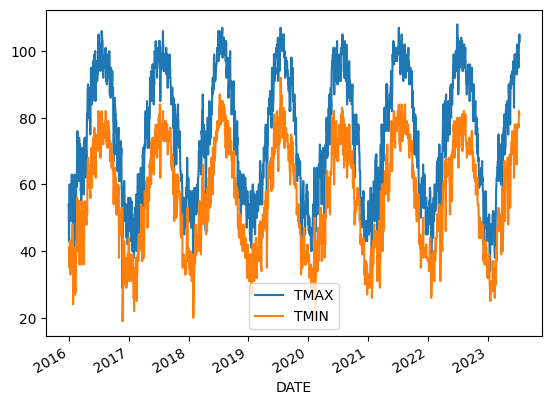

In [18]:
df[["TMAX","TMIN"]].plot()

In [19]:
df.index.year.value_counts().sort_index()

2016    366
2017    365
2018    364
2019    365
2020    366
2021    362
2022    365
2023    194
Name: DATE, dtype: int64

<AxesSubplot: xlabel='DATE'>

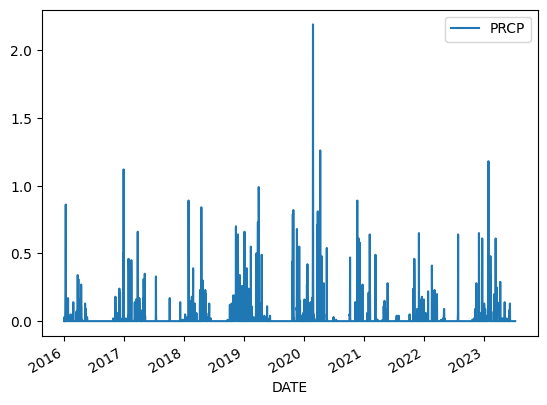

In [20]:
df[["PRCP"]].plot()


In [21]:
df.groupby(df.index.year).sum()["PRCP"]

DATE
2016     6.57
2017     6.44
2018    10.37
2019    12.41
2020    16.53
2021     5.21
2022     5.11
2023     5.49
Name: PRCP, dtype: float64

In [22]:
df["target"]=df.shift(-1)["TMAX"]
df

,PRCP,TAVG,TMAX,TMIN,averged,target
DATE,,,,,,
2016-01-01,0.00,49,54.0,41.0,9.4,51.0
2016-01-02,0.03,44,51.0,41.0,6.7,43.0
2016-01-03,0.00,36,43.0,41.0,2.2,44.0
2016-01-04,0.00,38,44.0,41.0,3.3,52.0
2016-01-05,0.00,44,52.0,35.0,6.7,54.0
...,...,...,...,...,...,...
2023-07-09,0.00,93,101.0,82.0,33.9,102.0
2023-07-10,0.00,93,102.0,81.0,33.9,104.0
2023-07-11,0.00,94,104.0,81.0,34.4,105.0


In [23]:
df1=df.iloc[:-1,:].copy()

In [24]:
df1

,PRCP,TAVG,TMAX,TMIN,averged,target
DATE,,,,,,
2016-01-01,0.00,49,54.0,41.0,9.4,51.0
2016-01-02,0.03,44,51.0,41.0,6.7,43.0
2016-01-03,0.00,36,43.0,41.0,2.2,44.0
2016-01-04,0.00,38,44.0,41.0,3.3,52.0
2016-01-05,0.00,44,52.0,35.0,6.7,54.0
...,...,...,...,...,...,...
2023-07-08,0.00,90,97.0,78.0,32.2,101.0
2023-07-09,0.00,93,101.0,82.0,33.9,102.0
2023-07-10,0.00,93,102.0,81.0,33.9,104.0


In [25]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.1)

In [26]:
from sklearn.model_selection import train_test_split

x=df1.drop("target",axis=1)
y=df1.target

In [27]:
x

,PRCP,TAVG,TMAX,TMIN,averged
DATE,,,,,
2016-01-01,0.00,49,54.0,41.0,9.4
2016-01-02,0.03,44,51.0,41.0,6.7
2016-01-03,0.00,36,43.0,41.0,2.2
2016-01-04,0.00,38,44.0,41.0,3.3
2016-01-05,0.00,44,52.0,35.0,6.7
...,...,...,...,...,...
2023-07-08,0.00,90,97.0,78.0,32.2
2023-07-09,0.00,93,101.0,82.0,33.9
2023-07-10,0.00,93,102.0,81.0,33.9


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=22,shuffle=False)

In [29]:
reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [30]:
y_predict=reg.predict(x_test)

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.970060483559446

In [32]:
# plt.plot(y_test)
ypredict=pd.Series(y_predict,index=y_test.index)
ypredict

DATE
2021-08-25     96.770012
2021-08-26     98.936588
2021-08-27     97.200391
2021-08-28     93.956362
2021-08-29     92.220165
                 ...    
2023-07-08     98.742877
2023-07-09    101.911530
2023-07-10    102.396924
2023-07-11    103.777731
2023-07-12    101.566320
Length: 687, dtype: float64

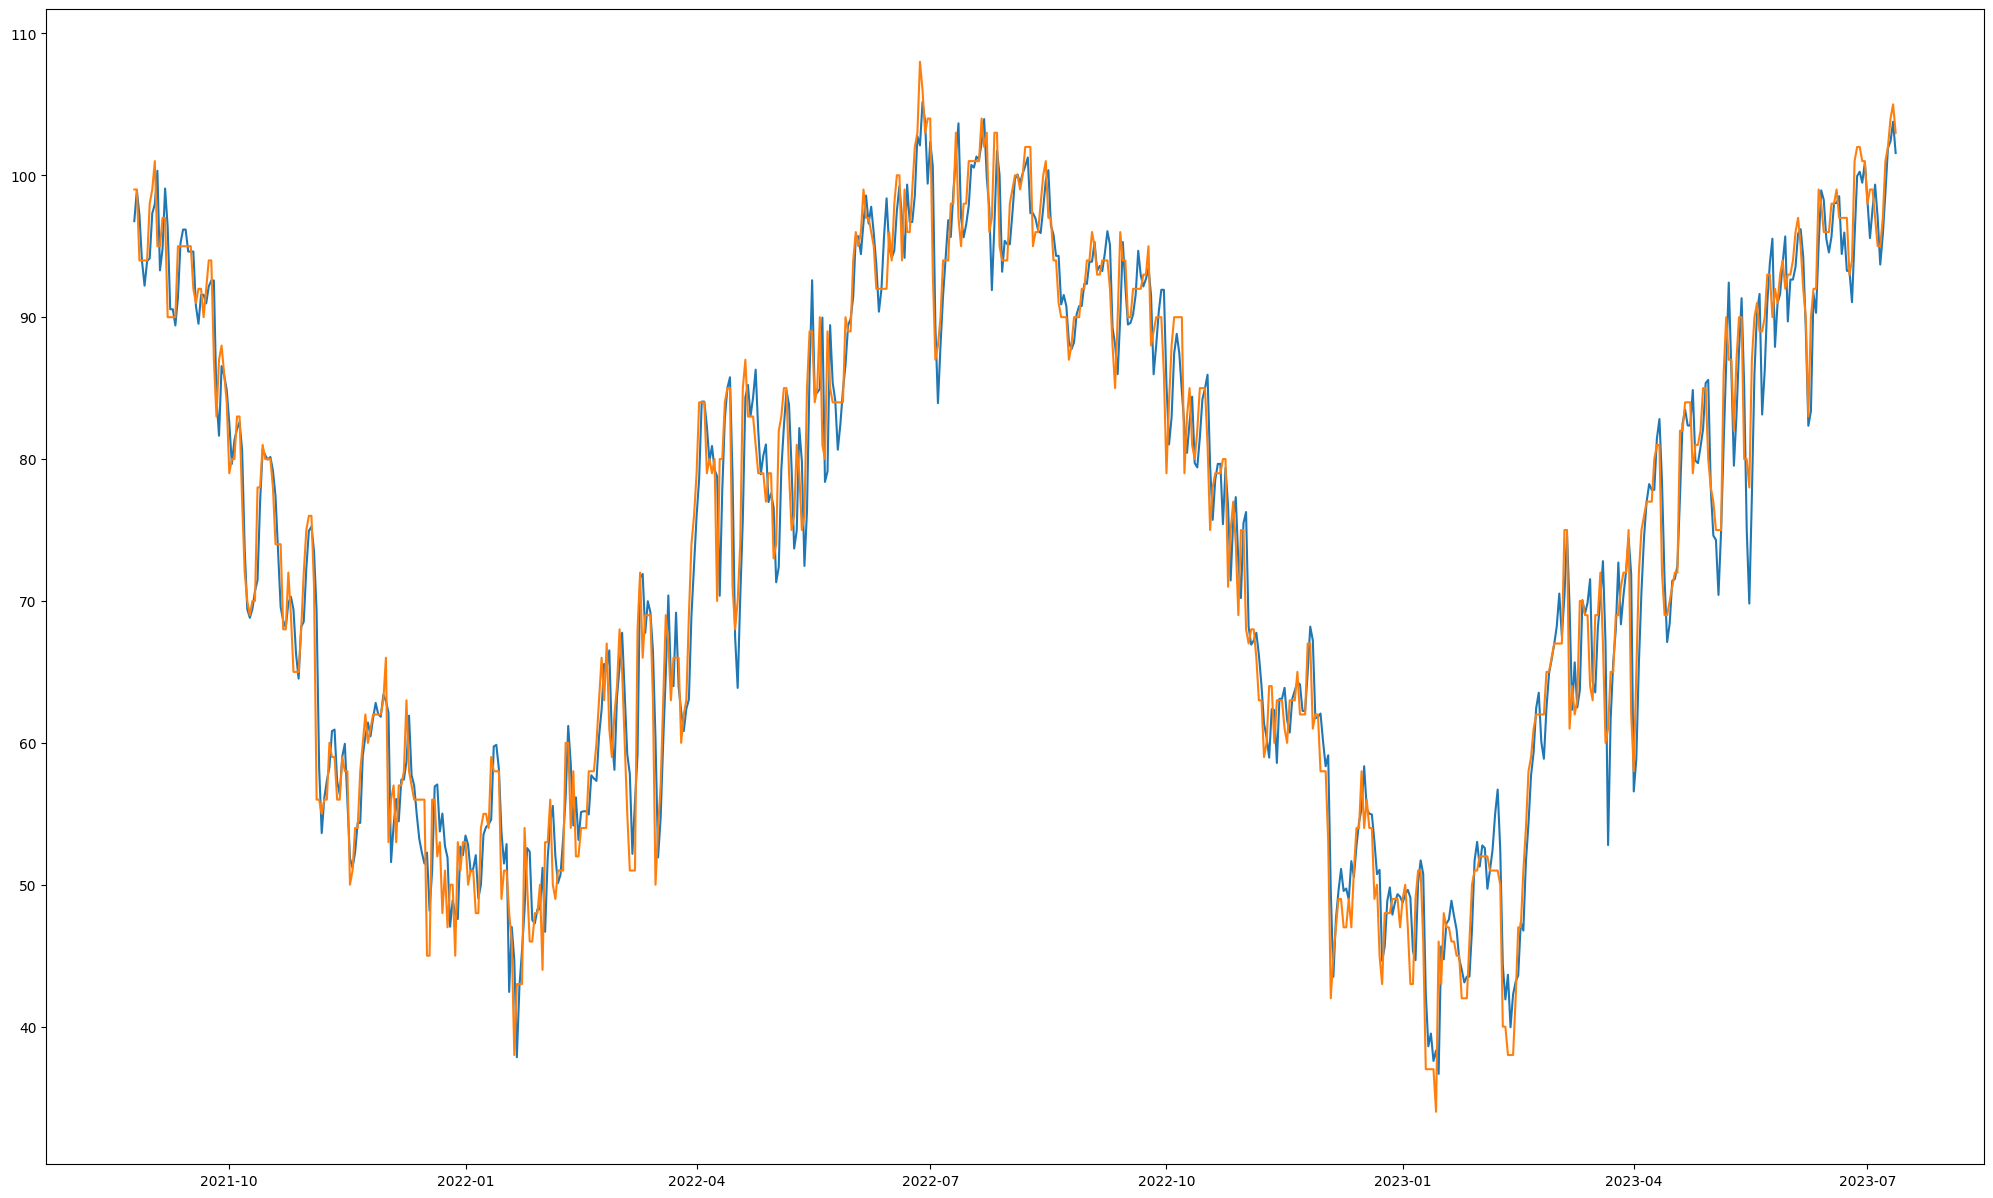

In [34]:
plt.figure(figsize=(25,15))
plt.plot(ypredict)
plt.plot(y_test)

In [41]:
print(y_test.head())
print("------")
print(ypredict.head())

DATE
2021-08-25    99.0
2021-08-26    99.0
2021-08-27    94.0
2021-08-28    94.0
2021-08-29    94.0
Name: target, dtype: float64
------
DATE
2021-08-25    96.770012
2021-08-26    98.936588
2021-08-27    97.200391
2021-08-28    93.956362
2021-08-29    92.220165
dtype: float64


In [54]:
combine=pd.concat([y_test,ypredict],axis=1)
combine

,target,0
DATE,,
2021-08-25,99.0,96.770012
2021-08-26,99.0,98.936588
2021-08-27,94.0,97.200391
2021-08-28,94.0,93.956362
2021-08-29,94.0,92.220165
...,...,...
2023-07-08,101.0,98.742877
2023-07-09,102.0,101.911530
2023-07-10,104.0,102.396924


In [61]:
combine.rename(columns={"target":"Actual",0:"Predicted"},inplace=True)
combine

,actual,Predicted
DATE,,
2021-08-25,99.0,96.770012
2021-08-26,99.0,98.936588
2021-08-27,94.0,97.200391
2021-08-28,94.0,93.956362
2021-08-29,94.0,92.220165
...,...,...
2023-07-08,101.0,98.742877
2023-07-09,102.0,101.911530
2023-07-10,104.0,102.396924


<AxesSubplot: xlabel='DATE'>

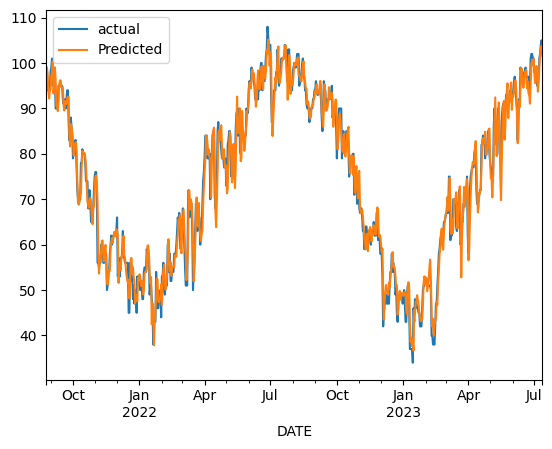

In [62]:
combine.plot()

In [67]:
import pickle
pickle.dump(reg,open("weather.pkl","wb"))